In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024371.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024358.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024337.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024382.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024420.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024409.jpg
/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024336.jpg
/kaggle/input/cnn-as

In [2]:
#("/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
data_dir_train = pathlib.Path("/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
## Load using keras.preprocessing
##Let's load these images off disk using the helpful image_dataset_from_directory utility.

batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Loading the training data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
# Loading the validation data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Loading the testing data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [10]:
# Listing out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


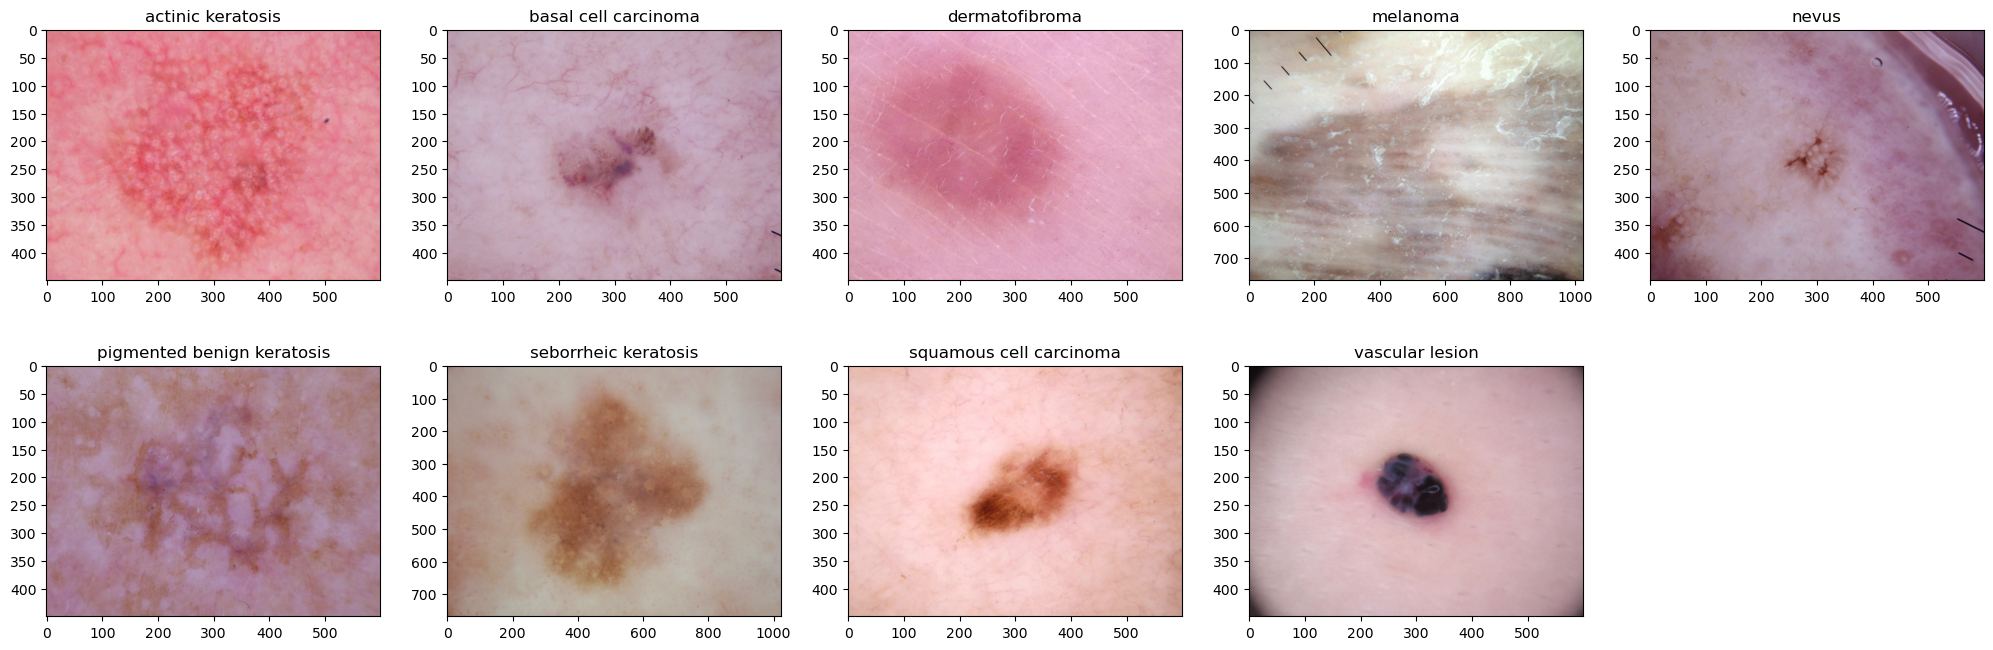

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [12]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,pigmented benign keratosis,462
1,melanoma,438
2,vascular lesion,139
3,actinic keratosis,114
4,squamous cell carcinoma,181
5,basal cell carcinoma,376
6,seborrheic keratosis,77
7,dermatofibroma,95
8,nevus,357


In [13]:

pip install seaborn


Note: you may need to restart the kernel to use updated packages.


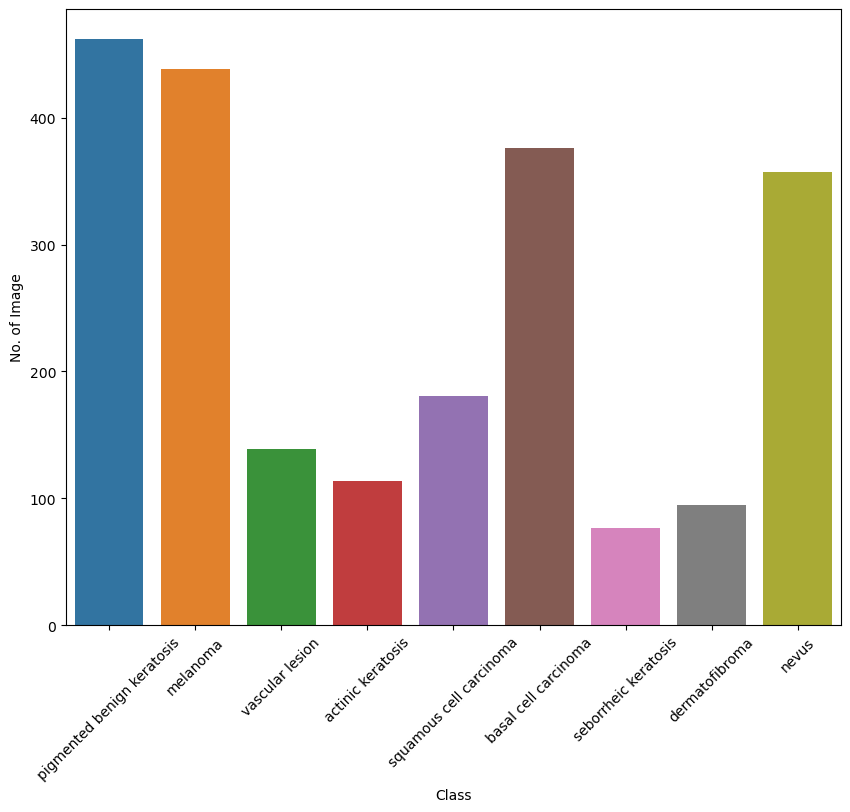

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(y="No. of Image", x="Class", data=df,
            label="Class")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# `Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.\
# `Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [17]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0

In [18]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 41s 159ms/step - loss: 3.0898 - accuracy: 0.2294 - val_loss: 1.9030 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 1.8302 - accuracy: 0.3376 - val_loss: 1.7364 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 1.5658 - accuracy: 0.4526 - val_loss: 1.5138 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 1.3499 - accuracy: 0.5195 - val_loss: 1.4978 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 1.2782 - accuracy: 0.5441 - val_loss: 1.4984 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.1601 - accuracy: 0.5926 - val_loss: 1.5182 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 4s 65ms/step - loss: 1.0540 - accuracy: 0.6311 - val_loss: 1.5102 - val_accuracy: 0.5168
Epoch 8/20


In [19]:
# Method to create plots of the loss and accuracy on the training and validation sets:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

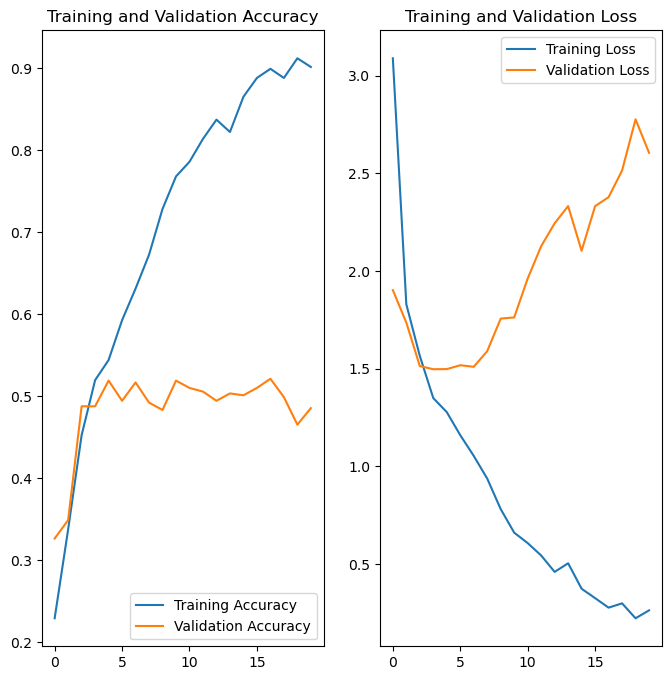

In [20]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

### Findings :
- As the training accuracy increases linearly over time (**upto 36%**), where as the validation accuracy stall at 25% accuracy in training process.
- As the training loss dereases with epochs the validation loss increases.
- The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around **25% accuracy on the validation set**.
- The difference in accuracy between training and validation accuracy is noticeable which is a sign of overfitting.

#### Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting
- Overfitting generally occurs when there are a small number of training examples. 
- Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. 
- This helps expose the model to more aspects of the data and generalize better.

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

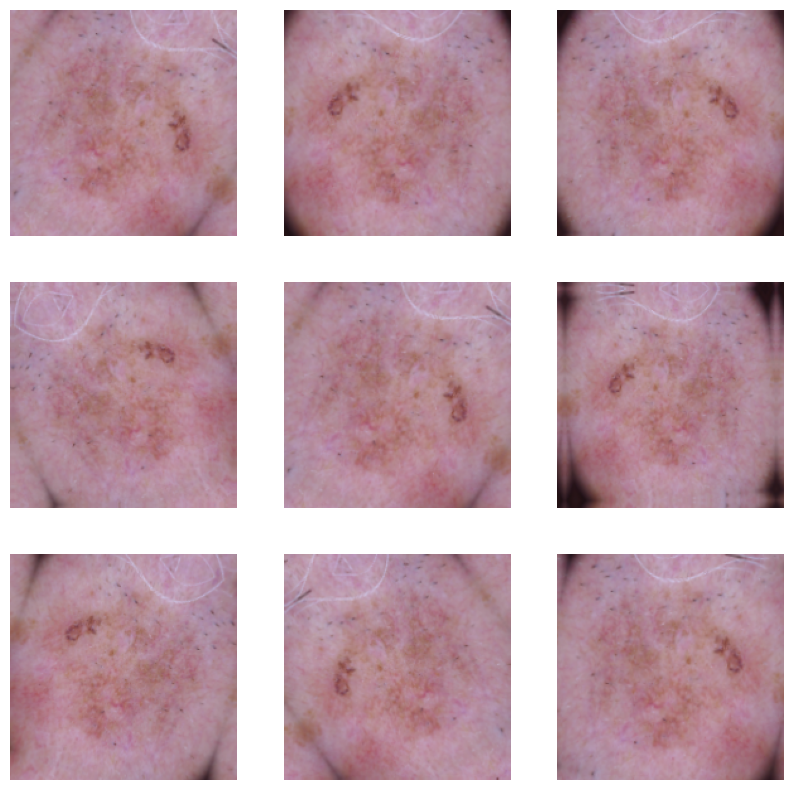

In [22]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Model Building & training on the augmented data

In [23]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [24]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [25]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 71ms/step - loss: 2.7994 - accuracy: 0.2556 - val_loss: 1.8101 - val_accuracy: 0.3423
Epoch 2/20
56/56 [==============================] - 4s 67ms/step - loss: 1.6966 - accuracy: 0.3906 - val_loss: 1.6678 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.5320 - accuracy: 0.4665 - val_loss: 1.5719 - val_accuracy: 0.4430
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4849 - accuracy: 0.4743 - val_loss: 1.4783 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4034 - accuracy: 0.4967 - val_loss: 1.4290 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4774 - accuracy: 0.4883 - val_loss: 1.4866 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 4s 70ms/step - loss: 1.3605 - accuracy: 0.5084 - val_loss: 1.4487 - val_accuracy: 0.4899
Epoch 8/20
56

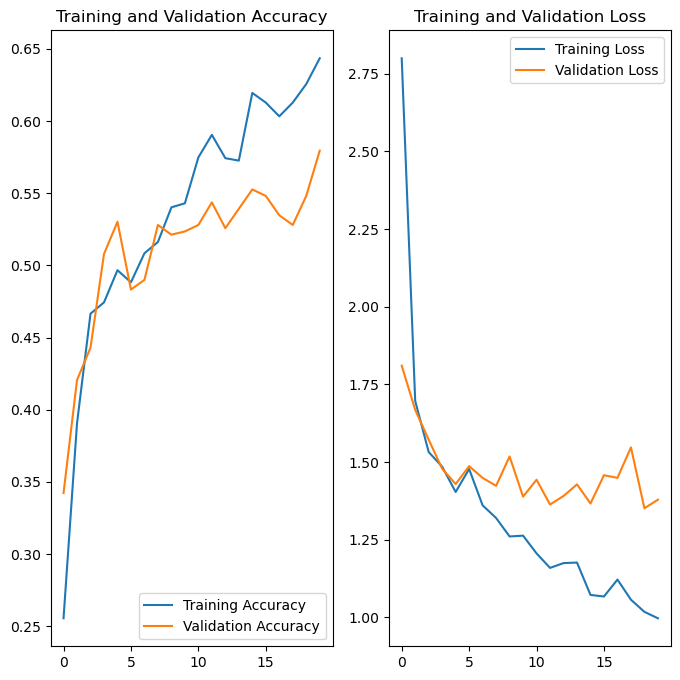

In [26]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

#### Findings :
1. As the training accuracy increases linearly over time (**upto 53%**), where as the validation accuracy increases and stall at 55% accuracy in training process.
2. As the training loss decreases with epochs the validation loss decreases and stalls.
2. The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around **51% accuracy on the validation set**.
3. The difference in accuracy between training and validation accuracy is lesser than previous (2%), its not overfitting.   

### Model Building & training on the augmented data with dropout

In [27]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [28]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [29]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2023-08-31 08:37:13.426906: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 [==============================] - 9s 118ms/step - loss: 3.6363 - accuracy: 0.2126 - val_loss: 1.9260 - val_accuracy: 0.2371
Epoch 2/20
56/56 [==============================] - 6s 111ms/step - loss: 1.8796 - accuracy: 0.2807 - val_loss: 1.8010 - val_accuracy: 0.4161
Epoch 3/20
56/56 [==============================] - 6s 111ms/step - loss: 1.7330 - accuracy: 0.3739 - val_loss: 1.6203 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 6s 112ms/step - loss: 1.5204 - accuracy: 0.4604 - val_loss: 1.5607 - val_accuracy: 0.4541
Epoch 5/20
56/56 [==============================] - 6s 111ms/step - loss: 1.4719 - accuracy: 0.4810 - val_loss: 1.4335 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 6s 113ms/step - loss: 1.4329 - accuracy: 0.4888 - val_loss: 1.6167 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 6s 113ms/step - loss: 1.4102 - accuracy: 0.4933 - val_loss: 1.5326 - val_accuracy: 0.4787
Epoch 8/20
56/56 

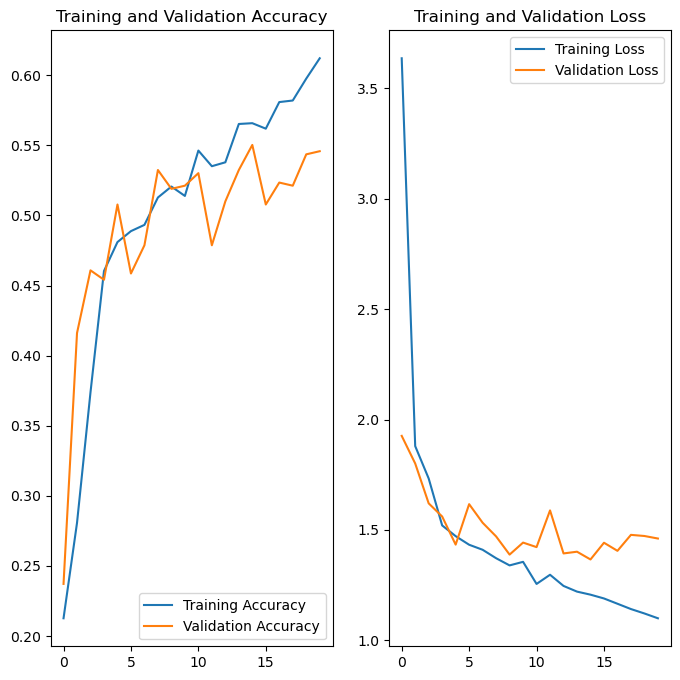

In [30]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

#### Findings :
1. As the training accuracy decreased  (**upto 20%**), where as the validation accuracy increases and stall at 55% accuracy in training process.
2. As the training loss decreases with epochs the validation loss decreases
3. The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around **20% accuracy on the validation set**.
4. The difference in accuracy between training and validation accuracy is very less. 
5. Model is underfitted

**We can clearly see that the overfitting of the model has redused significantly when compared the earlier models**

#### Class distribution:
- Examining the current class distribution in the training dataset

In [31]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


- Findings :
1. Which class has the least number of samples?
    - seborrheic keratosis with 77 samples
2. Which classes dominate the data in terms proportionate number of samples?
    -  pigmented benign keratosis with 462 samples

#### Handling class imbalances:
- Rectifing class imbalances present in the training dataset with Augmentor library.

In [32]:
!pip install Augmentor

- To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [33]:
path_to_training_dataset="/kaggle/input/cnn-assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory="/kaggle/working/melanoma/"+i+"/")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/melanoma/actinic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50BDE175E0>: 100%|██████████| 500/500 [00:13<00:00, 37.31 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/melanoma/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FF454B4F0>: 100%|██████████| 500/500 [00:12<00:00, 39.46 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/melanoma/dermatofibroma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FF4562C20>: 100%|██████████| 500/500 [00:12<00:00, 39.58 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/melanoma/melanoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4FF44463B0>: 100%|██████████| 500/500 [01:18<00:00,  6.36 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/melanoma/nevus/.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F4FF47D1660>: 100%|██████████| 500/500 [01:22<00:00,  6.09 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/melanoma/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FF45634C0>: 100%|██████████| 500/500 [00:12<00:00, 39.79 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/melanoma/seborrheic keratosis/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4FF4632560>: 100%|██████████| 500/500 [00:30<00:00, 16.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/melanoma/squamous cell carcinoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4FF459C8E0>: 100%|██████████| 500/500 [00:12<00:00, 40.54 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/melanoma/vascular lesion/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FF4673F70>: 100%|██████████| 500/500 [00:13<00:00, 37.19 Samples/s]                  


In [34]:
data_dir_train = pathlib.Path("/kaggle/working/melanoma/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)



4500


- Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [36]:
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [37]:
df['Label'].value_counts()

vascular lesion               500
actinic keratosis             500
melanoma                      500
nevus                         500
squamous cell carcinoma       500
seborrheic keratosis          500
dermatofibroma                500
basal cell carcinoma          500
pigmented benign keratosis    500
Name: Label, dtype: int64

- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [38]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [39]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


### Model Building & training on the rectified class imbalance data :
- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~30 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [41]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
#model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [42]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [43]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 17s 123ms/step - loss: 2.4192 - accuracy: 0.2333 - val_loss: 1.8245 - val_accuracy: 0.3244
Epoch 2/30
113/113 [==============================] - 15s 124ms/step - loss: 1.7141 - accuracy: 0.3494 - val_loss: 1.5585 - val_accuracy: 0.4311
Epoch 3/30
113/113 [==============================] - 14s 117ms/step - loss: 1.5046 - accuracy: 0.4247 - val_loss: 1.5540 - val_accuracy: 0.3989
Epoch 4/30
113/113 [==============================] - 15s 123ms/step - loss: 1.3932 - accuracy: 0.4672 - val_loss: 1.3550 - val_accuracy: 0.4644
Epoch 5/30
113/113 [==============================] - 14s 117ms/step - loss: 1.3772 - accuracy: 0.4667 - val_loss: 1.2864 - val_accuracy: 0.5089
Epoch 6/30
113/113 [==============================] - 15s 128ms/step - loss: 1.3121 - accuracy: 0.4969 - val_loss: 1.2547 - val_accuracy: 0.4989
Epoch 7/30
113/113 [==============================] - 14s 121ms/step - loss: 1.2394 - accuracy: 0.5222 - val_loss: 1.2121 - val_ac

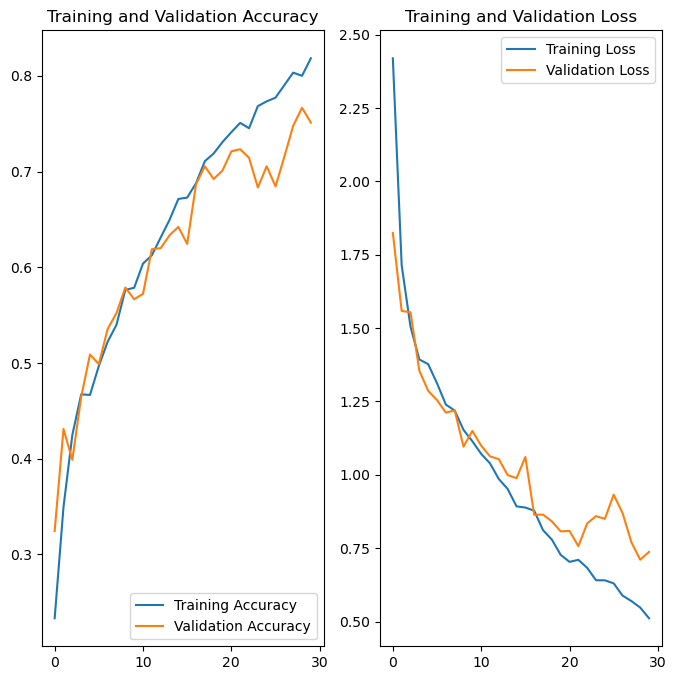

In [44]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

Findings :
As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.
As the training loss decreases with epochs the validation loss also decreases.
The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 75% accuracy on the validation set.
The difference in accuracy between training and validation accuracy is very less

Class rebalancing not only got rid of overfitting it also improved the accuracy from 55% to 75%.

- Findings :
1. Which class has the least number of samples?
    - seborrheic keratosis with 77 samples
2. Which classes dominate the data in terms proportionate number of samples?
    -  pigmented benign keratosis with 462 samples